<a href="https://colab.research.google.com/github/RenukaBenkalkar/Python/blob/main/Classifier_Algorithm_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loan Approval Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
from google.colab import files
d=files.upload()

Saving loan_approval.csv to loan_approval.csv


In [3]:
#Read Dataset
df =pd.read_csv('loan_approval.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#Datatypes of columns
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [4]:
#copy of dataset
df_sp=df

In [5]:
#Number of rows and columns
df.shape

(4269, 13)

In [6]:
#Number of data in dataset
df.size

55497

In [7]:
#Transpose columns to rows
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [8]:
#Remove Duplicates
df.drop_duplicates()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
#Check for null values
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
#Remove loan id column else getting error
df_sp=df_sp.drop('loan_id',axis=1)

In [10]:
df_sp.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [11]:
#df_sp[' education'].value_counts()

In [ ]:
df_sp.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [14]:
#Label encoding, map,get dummies
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[' education']=le.fit_transform(df[' education'])
df[' self_employed']=le.fit_transform(df[' self_employed'])
df[' loan_status']=le.fit_transform(df[' loan_status'])
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [24]:
df=df.drop(columns=['loan_id'])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [25]:
#Correlation
df.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246
luxury_assets_value,0.002817,-0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.015465


<Axes: >

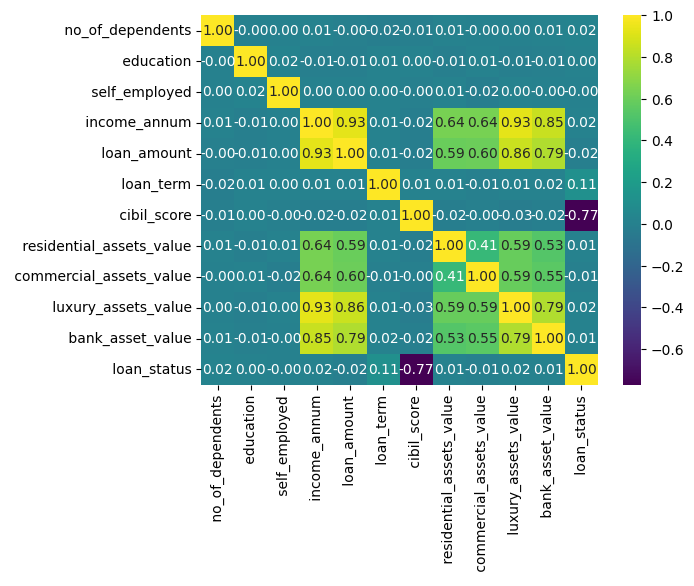

In [26]:
#Visualize correlation
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='viridis')

ValueError: num must be an integer with 1 <= num <= 8, not 9

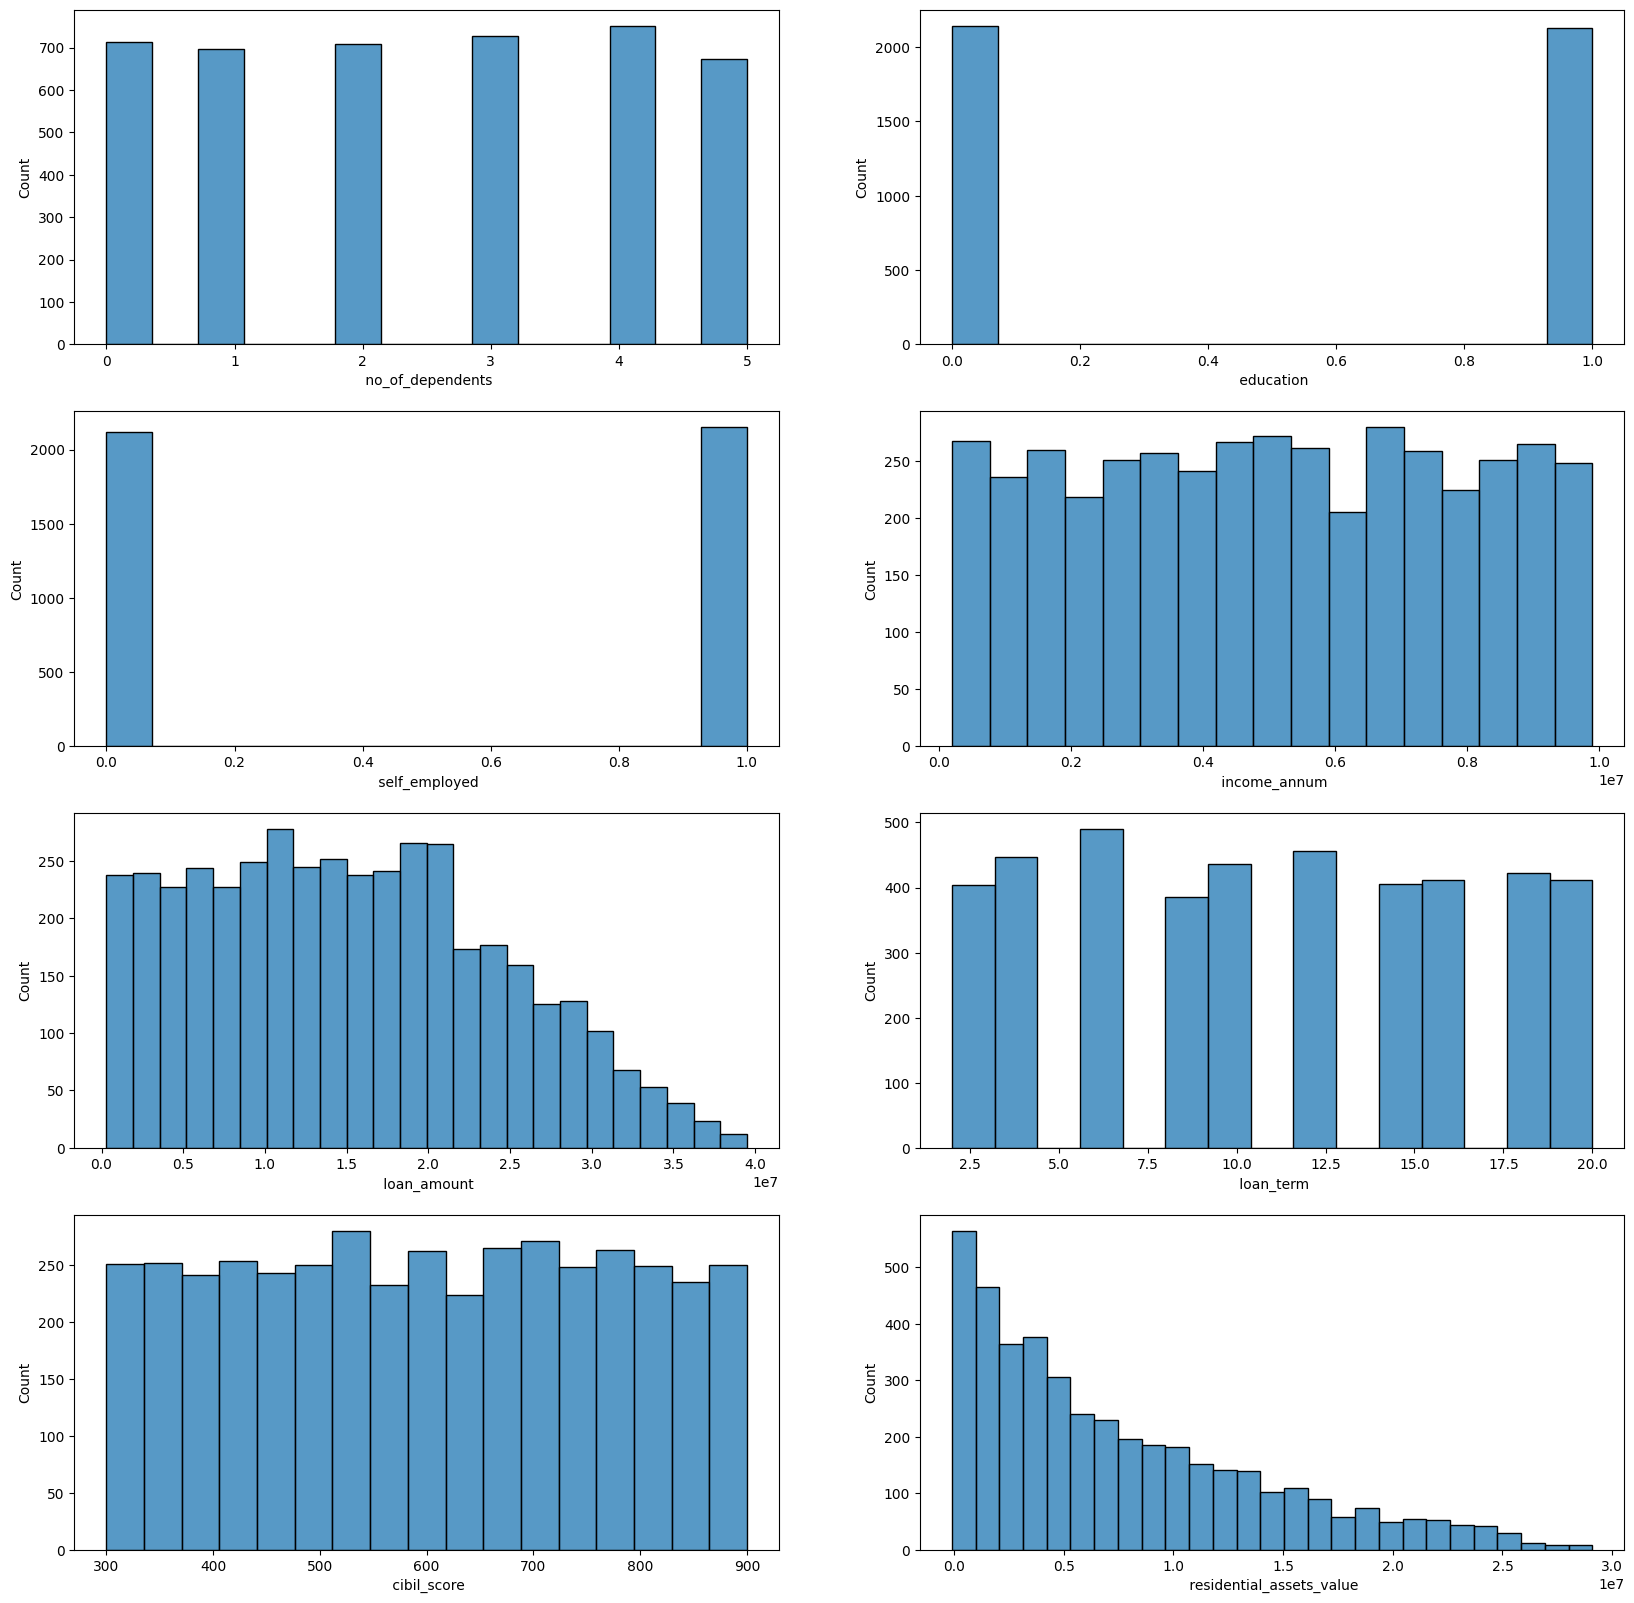

In [27]:
#visualization- univariate analysis, each colm analysis
fig =plt.figure(figsize=(20,20))
for i,col in enumerate(df.drop([' loan_status'],axis=1)):
  #axis-1 col, 0-row
  ax=fig.add_subplot(4,2,i+1)  # 4 rows and 2 is colm and i-subplot
  sns.histplot(df[col])

In [28]:
#Target variable outcome
df[' loan_status'].value_counts()

,count
loan_status,
0,2656
1,1613


<Axes: xlabel=' loan_status', ylabel='count'>

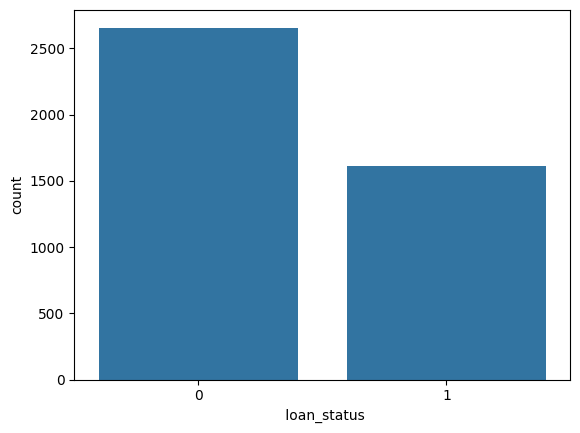

In [31]:
#Visualize the outcome
sns.countplot(data=df,x=' loan_status')

In [32]:
#feature selection
x=df.iloc[:,:-1] #except last column
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [33]:
y=df[' loan_status']
y.head()

,loan_status
0,0
1,1
2,1
3,1
4,1


In [34]:
#Train and test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
xtrain.shape

(3415, 11)

In [36]:
xtest.shape

(854, 11)

In [37]:
ytrain.shape

(3415,)

In [38]:
ytest.shape

(854,)

In [39]:
xtrain.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,5,1,0,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,0,1,1,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,1,0,0,800000,2900000,8,682,2200000,1100000,2900000,700000
910,2,0,1,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,5,0,1,3000000,11100000,12,441,8500000,2500000,7300000,2000000


In [40]:
ytrain.head()

,loan_status
1675,0
1164,0
192,0
910,0
567,1


In [41]:
#Decision Tree, split data is decided by entropy ,gini
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,criterion='gini')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [42]:
#Evaluation, result is 96%accuracy
from sklearn.metrics import accuracy_score
print('Accuracy', accuracy_score(ytest,ypred))# Decision tree 74% accuracy

Accuracy 0.9637002341920374


In [45]:
# Tree visualization
from sklearn import tree
text=tree.export_text(dt)
print(text)

|--- feature_6 <= 549.50
|   |--- feature_5 <= 5.00
|   |   |--- feature_4 <= 26250000.00
|   |   |   |--- class: 1
|   |   |--- feature_4 >  26250000.00
|   |   |   |--- class: 0
|   |--- feature_5 >  5.00
|   |   |--- class: 1
|--- feature_6 >  549.50
|   |--- feature_7 <= 50000.00
|   |   |--- feature_4 <= 600000.00
|   |   |   |--- class: 1
|   |   |--- feature_4 >  600000.00
|   |   |   |--- class: 0
|   |--- feature_7 >  50000.00
|   |   |--- feature_7 <= 950000.00
|   |   |   |--- class: 0
|   |   |--- feature_7 >  950000.00
|   |   |   |--- class: 0



In [46]:
#file -create file -write
with open('dtc_text.log','w') as fout:
  fout.write(text)

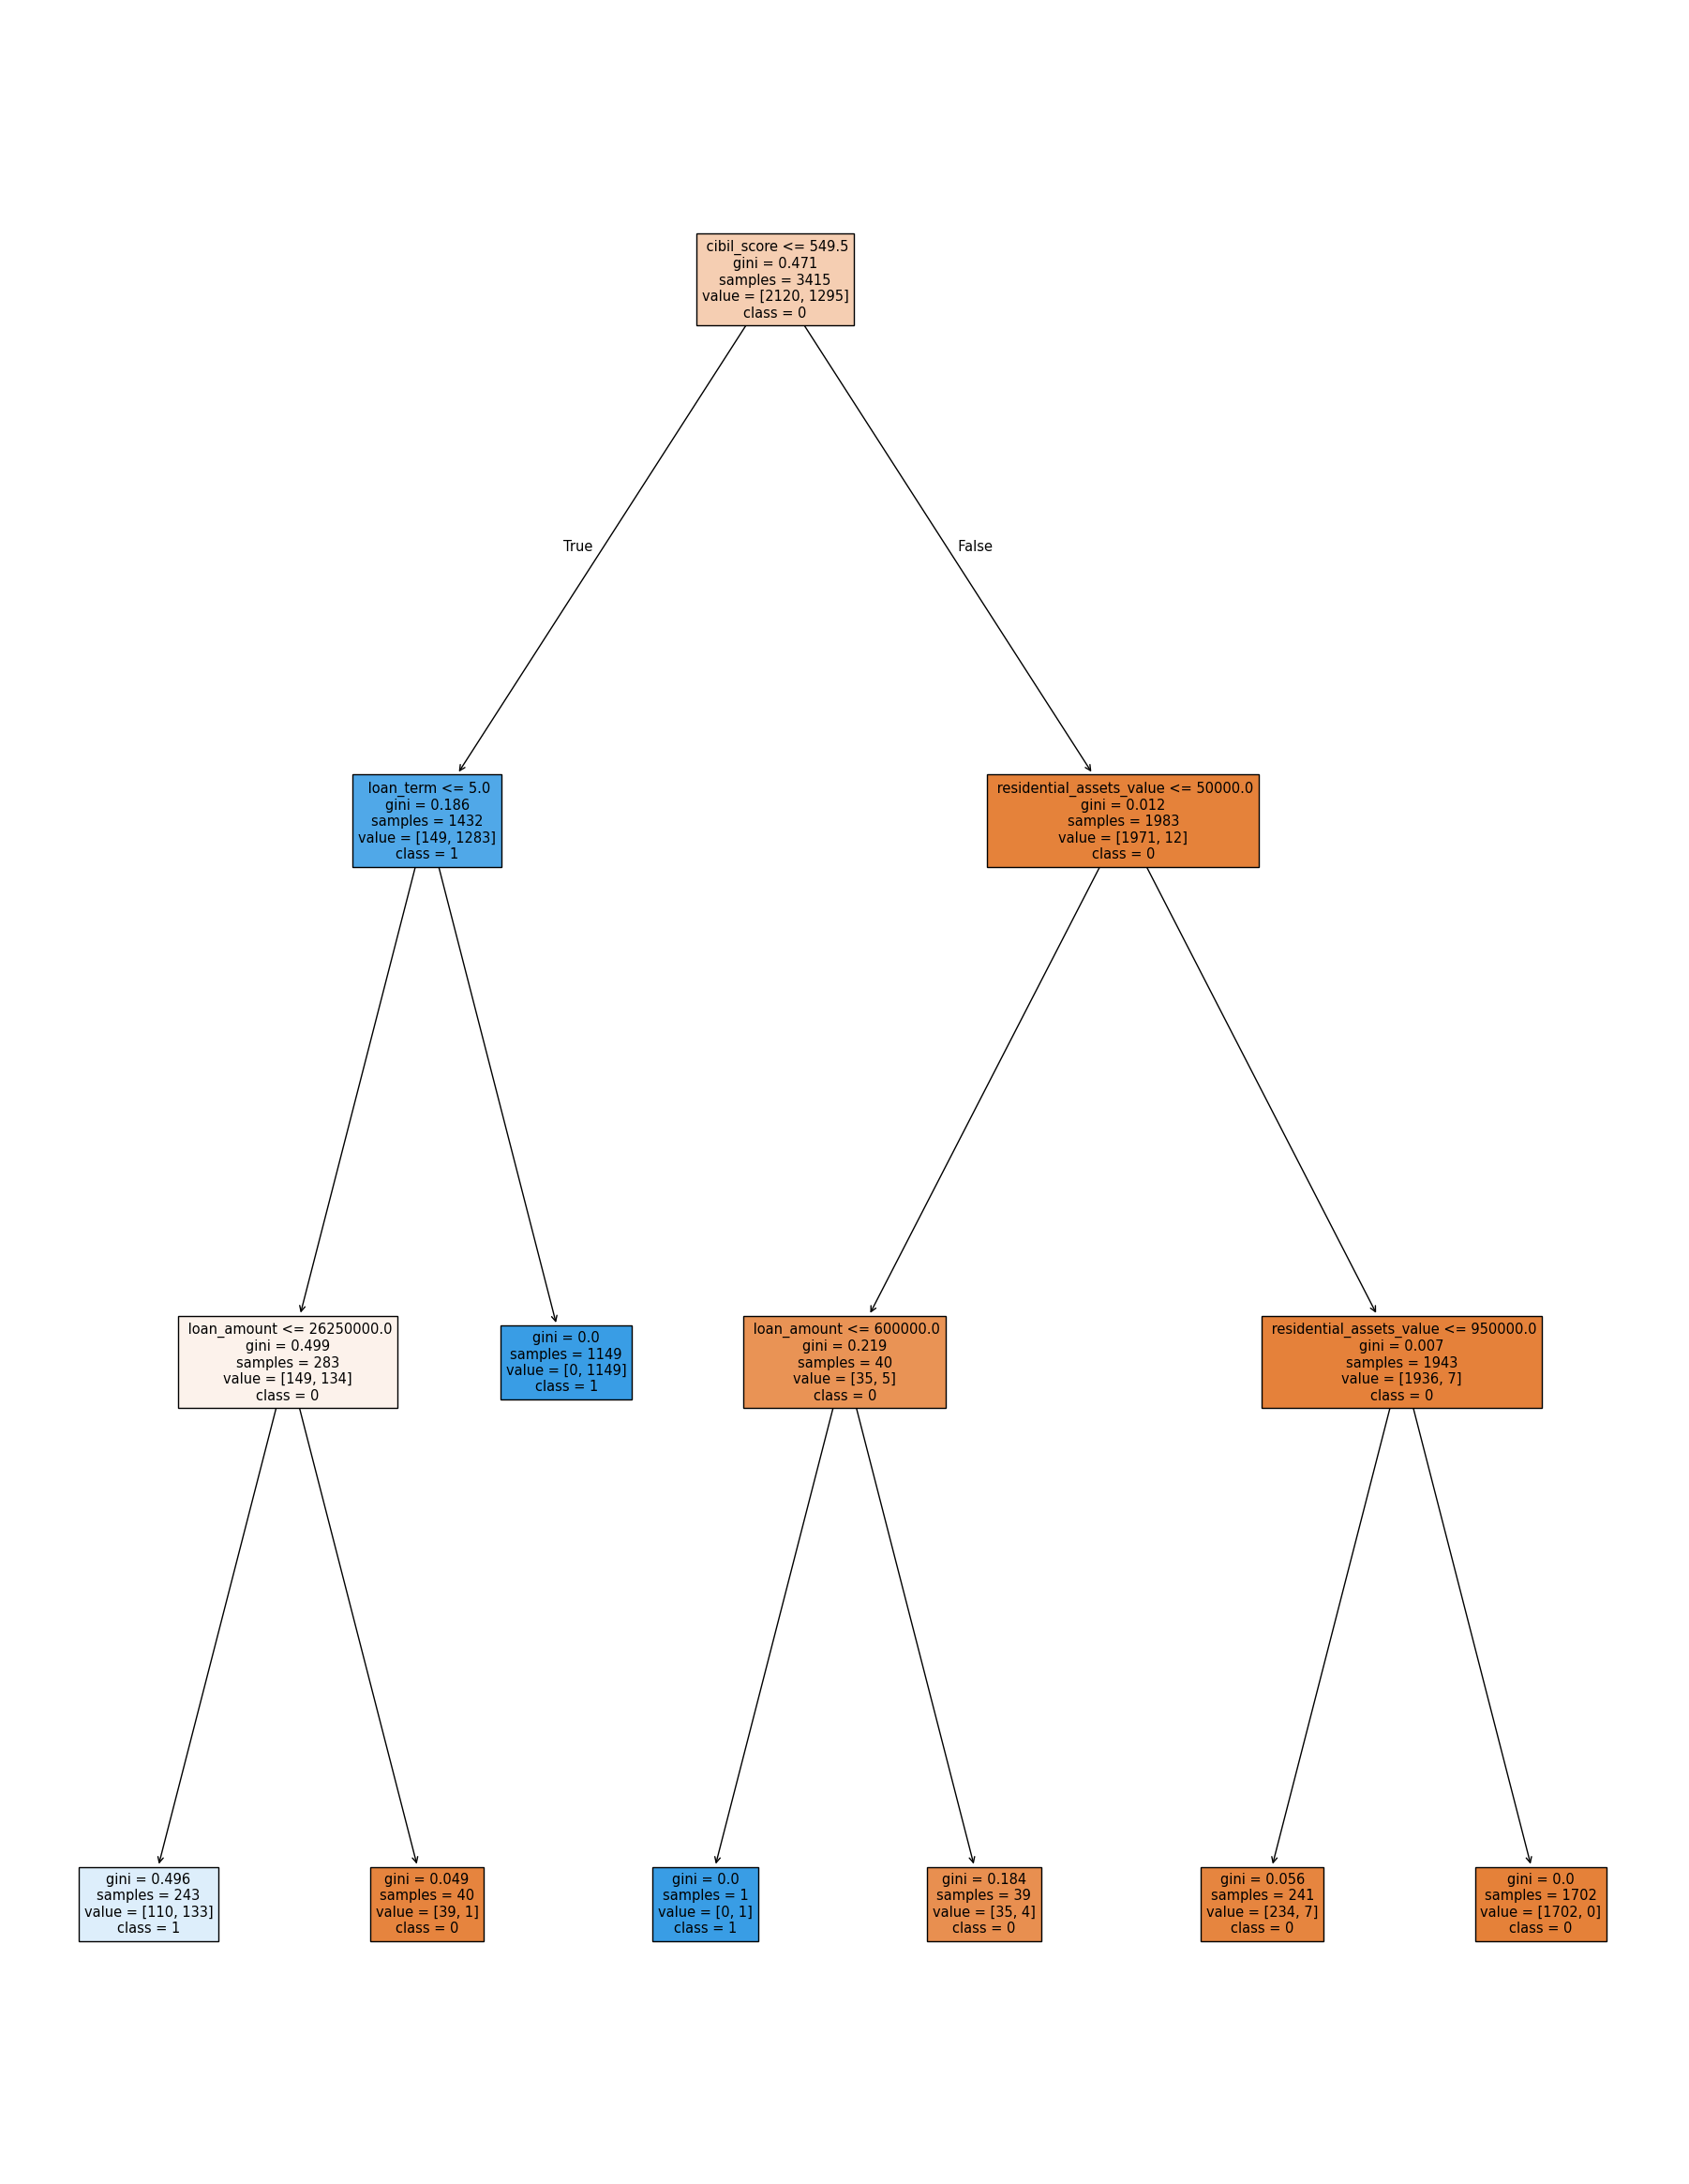

In [47]:
#Tree visualization
features=x.columns
features
target=['0','1']
fig=plt.figure(figsize=(23,30))
plot=tree.plot_tree(dt,feature_names=features,class_names=target,filled=True)
fig.savefig('dtc_pic_gini.png')

In [48]:
#Evaluation Matrix, confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
print(cm)

[[508  28]
 [  3 315]]


Confusion matrix: Diagonal values are correct. There are 30 wrong valyes

<Axes: >

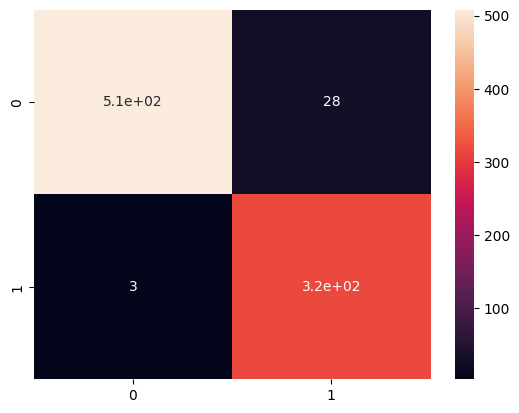

In [49]:
#Visualization of Confusion matrix
sns.heatmap(cm,annot=True)

In [50]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)

0.9905660377358491

In [51]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150,max_features=5,random_state=101) #call the fn
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
#Evaluation metrics
print('Accuracy', accuracy_score(ytest,ypred))

Accuracy 0.9789227166276346


In [54]:
#Fine tunning of parameters
#Random Forest Classifier model with 200 trees
from sklearn.ensemble import RandomForestClassifier
rfc_450=RandomForestClassifier(n_estimators=200,max_features=5,random_state=101) #call the fn
rfc_450.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
#Evaluation metrics
print('Accuracy', accuracy_score(ytest,ypred))

Accuracy 0.9789227166276346


With Decision Tree accuracy is 99%
With Random Forest accuracy is 97%

In [55]:
#Boosting Algorithms
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,random_state=101)
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
#Evaluation metrics
print('Accuracy', accuracy_score(ytest,ypred))

Accuracy 0.977751756440281


In [57]:
 #Fine tunning withGradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1,min_samples_split=100,min_samples_leaf=10,random_state=101)
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
#Evaluation metrics
print('Accuracy', accuracy_score(ytest,ypred))#

Accuracy 0.9765807962529274


In [58]:
#XgBoost =Extreme boostinf algorithms
from xgboost import XGBClassifier
xgbc= XGBClassifier()
xgbc.fit(xtrain,ytrain)
ypred=xgbc.predict(xtest)
#Evaluation metrics
print('Accuracy', accuracy_score(ytest,ypred))

Accuracy 0.9824355971896955


In [59]:
#fine tunning with xgboost
xgbc1= XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=10)
xgbc1.fit(xtrain,ytrain)
ypred=xgbc.predict(xtest)
#Evaluation metrics
print('Accuracy', accuracy_score(ytest,ypred))

Accuracy 0.9824355971896955


With Boosting Algoriths:
Gradient Boosting accuracy 97%
Extreme Boosting(xgBoost), accuracy 98%